ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/pooja/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/pooja/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/pooja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/pooja/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/pooja/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/pooja/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, 

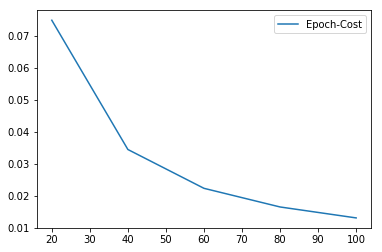

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

#LEARNING RATE=0.5

x1=tf.constant([2.7810836,1.465489372,3.396561688,1.38807019,3.06407232,7.627531214,5.332441248,6.922596716,8.675418651,7.673756466],name='x1')
x2=tf.constant([2.550537003,2.362125076,4.400293529,1.850220317,3.005305973,2.759262235,2.088626775,1.77106367,-0.242068655,3.508563011],name='x2')
y=tf.constant([0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0],name='out')

epoch=tf.constant(100)
interval=tf.constant([20.0,40.0,60.0,80.0,100.0])
learn_rate=0.5
theta0=tf.constant(0.0)
theta1=tf.constant(0.0)
theta2=tf.constant(0.0)
k=tf.constant(0)

inter=tf.div(epoch,20)
inter=tf.cast(inter,tf.int32)


model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    output = tf.TensorArray(size=inter, dtype=tf.float32)
    theta_array = tf.TensorArray(size=3,dtype=tf.float32)
    for i in range(sess.run(epoch)):
        sum_err=0.0
        for j in range(sess.run(tf.size(x1))):
            l=0
            yhat = 1.0/(1.0+tf.exp(-theta0-(theta1*x1[j])-(theta2*x2[j])))
            #error = y[j]-yhat
            error=tf.subtract(y[j],yhat)
            #sum_err = sum_err+tf.square(error)
            sum_err=tf.add(sum_err,tf.square(error))
            #theta0 = theta0 + learn_rate* error * yhat * (1.0 - yhat)
            theta0=tf.add(theta0,tf.multiply(learn_rate,tf.multiply(error,tf.multiply(yhat,tf.subtract(1.0,yhat)))))
            theta_array = theta_array.write(l, theta0)
            #theta1 = theta1 + learn_rate* error * yhat * (1.0 - yhat)*x1[i]
            theta1 =tf.add(theta1,tf.multiply(learn_rate,tf.multiply(error,tf.multiply(tf.multiply(yhat,x1[j]),tf.subtract(1.0,yhat)))))
            theta_array = theta_array.write(l+1, theta1)
            #theta2 = theta2 + learn_rate* error * yhat * (1.0 - yhat)*x2[i]
            theta2 =tf.add(theta2,tf.multiply(learn_rate,tf.multiply(error,tf.multiply(tf.multiply(yhat,x2[j]),tf.subtract(1.0,yhat)))))
            theta_array = theta_array.write(l+2, theta2)
        if (i+1) % 20 == 0:
            print("Epoch value:",(i+1))
            print("Theta0:",sess.run(theta0))
            print("Theta1:",sess.run(theta1))
            print("Theta2:",sess.run(theta2))
            print("Error:",sess.run(sum_err))
            output= output.write(k, sum_err)
            k=k+1
    output_final = output.stack()
   
    #part 2
    print(sess.run(output_final))
    plt.plot(sess.run(interval),sess.run(output_final),label='Epoch-Cost')
    plt.legend()
    plt.show()